In [1]:
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy import optimize
import pandas as pd

from scipy import integrate
from scipy import special


In [2]:
# Parameters

#s_tilda=np.linspace(0,10,100)
        #doesn't change much between the choice of 10 or 99


m1 = 0.050                                #GeV DM Mass
delta=0.3*m1
m2=m1+delta

mzprime=0.150                                  #Mass of the dark photon in GeV    150 MeV
Mp = 1.22e19   
m=0.000501                                 # I choose the electron mass in Gev


s0= m1**2 + m2**2 + 2*m1*m2
sample=np.linspace(0,10,100)         # How can be its range?     ****up to 100 GeV
s=sample+s0+0.002                      #the lowest value for s is s0 (assuming velocities zeros)

s_che_va_dentro_sigma=s-s0



epsilon=1E-4               # Has inside some factors as indicated in the computation papers     1E-4
alpha_dark=1E-1               # what values?       (1E-3    -   1E-1)  
alpha_em=1/137



pfin_pinit= (np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))))   # ratio pfinal over p initial
p_fin=np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)        # p final
p_init=np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))      # p initial had to add the
               #abs was inside the sqrt to keep it positive           #absolute value because the first elemnt gives a sqrt of negative

E1= np.sqrt(m1**2 + p_init**2)
E2= np.sqrt(m2**2 + p_init**2)


In [3]:
s

array([ 0.015225  ,  0.1162351 ,  0.2172452 ,  0.3182553 ,  0.4192654 ,
        0.52027551,  0.62128561,  0.72229571,  0.82330581,  0.92431591,
        1.02532601,  1.12633611,  1.22734621,  1.32835631,  1.42936641,
        1.53037652,  1.63138662,  1.73239672,  1.83340682,  1.93441692,
        2.03542702,  2.13643712,  2.23744722,  2.33845732,  2.43946742,
        2.54047753,  2.64148763,  2.74249773,  2.84350783,  2.94451793,
        3.04552803,  3.14653813,  3.24754823,  3.34855833,  3.44956843,
        3.55057854,  3.65158864,  3.75259874,  3.85360884,  3.95461894,
        4.05562904,  4.15663914,  4.25764924,  4.35865934,  4.45966944,
        4.56067955,  4.66168965,  4.76269975,  4.86370985,  4.96471995,
        5.06573005,  5.16674015,  5.26775025,  5.36876035,  5.46977045,
        5.57078056,  5.67179066,  5.77280076,  5.87381086,  5.97482096,
        6.07583106,  6.17684116,  6.27785126,  6.37886136,  6.47987146,
        6.58088157,  6.68189167,  6.78290177,  6.88391187,  6.98

In [4]:
def pfin_pinit(s):
    return np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))

def p_fin(s):
    return np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)

def p_init(s):
    return np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))

def E1(s):
    return np.sqrt(m1**2 + p_init(s)**2)

def E2(s):
    return np.sqrt(m2**2 + p_init(s)**2)

In [5]:
s0= m1**2 + m2**2 + 2*m1*m2
s0

0.013225

[0.05       0.0483114  0.04667982 0.04510335 0.04358011 0.04210832
 0.04068624 0.03931218 0.03798452 0.03670171 0.03546221 0.03426458
 0.03310739 0.03198929 0.03090894 0.02986508 0.02885648 0.02788194
 0.0269403  0.02603047 0.02515137 0.02430196 0.02348123 0.02268822
 0.02192199 0.02118164 0.02046629 0.0197751  0.01910726 0.01846196
 0.01783847 0.01723602 0.01665393 0.01609149 0.01554805 0.01502296
 0.0145156  0.01402538 0.01355171 0.01309404 0.01265183 0.01222455
 0.0118117  0.0114128  0.01102736 0.01065495 0.01029511 0.00994742
 0.00961147 0.00928687 0.00897324 0.00867019 0.00837738 0.00809446
 0.00782109 0.00755696 0.00730175 0.00705515 0.00681688 0.00658666
 0.00636422 0.00614928 0.00594161 0.00574095 0.00554707 0.00535973
 0.00517872 0.00500382 0.00483484 0.00467155 0.00451378 0.00436134
 0.00421405 0.00407174 0.00393422 0.00380136 0.00367298 0.00354893
 0.00342908 0.00331327 0.00320138 0.00309326 0.00298879 0.00288786
 0.00279033 0.00269609 0.00260504 0.00251706 0.00243205 0.0023

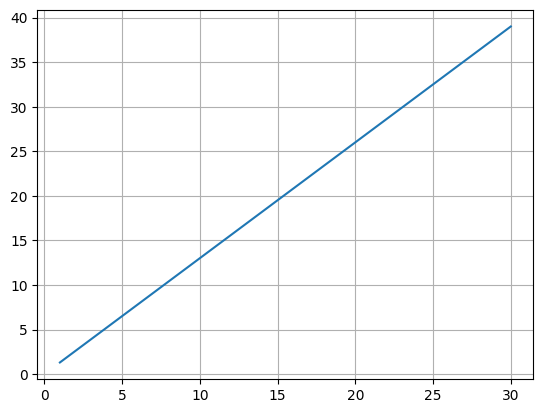

In [84]:
x1=np.logspace(np.log10(1),np.log10(30),100)       #***** CHANGING THIS INTERVAL CHANGE EVERITHING****

# I choose this in order to have a temperature range that goes from 50 MeV to 1 MeV      ****m2!!!**
# Should be this correct?


# x=m/T         x1=np.logspace(np.log10(1),np.log10(100),100)


x2=x1*((m1+delta)/m1)
plt.plot(x1,x2)
plt.grid()

T=m2/x2
print(T)
Tsomething=m1/x1        #Just to prove that they are equal
print(Tsomething)

In [85]:
# I NEED TO FLIP 'T' TO HAVE IT IN THE RIGHT WAY
# THE TEMPERATURE NOW WILL BE THE ARRAY 'Ttrue'

# ACTUALLY... DO I NEED TO FLIP IT REALLY?!?!?

Ttrue=np.flip(T)     
Ttrue

#This is the temperature in GeV?

array([0.00166667, 0.00172492, 0.00178521, 0.00184761, 0.00191219,
       0.00197902, 0.00204819, 0.00211978, 0.00219388, 0.00227056,
       0.00234992, 0.00243205, 0.00251706, 0.00260504, 0.00269609,
       0.00279033, 0.00288786, 0.00298879, 0.00309326, 0.00320138,
       0.00331327, 0.00342908, 0.00354893, 0.00367298, 0.00380136,
       0.00393422, 0.00407174, 0.00421405, 0.00436134, 0.00451378,
       0.00467155, 0.00483484, 0.00500382, 0.00517872, 0.00535973,
       0.00554707, 0.00574095, 0.00594161, 0.00614928, 0.00636422,
       0.00658666, 0.00681688, 0.00705515, 0.00730175, 0.00755696,
       0.00782109, 0.00809446, 0.00837738, 0.00867019, 0.00897324,
       0.00928687, 0.00961147, 0.00994742, 0.01029511, 0.01065495,
       0.01102736, 0.0114128 , 0.0118117 , 0.01222455, 0.01265183,
       0.01309404, 0.01355171, 0.01402538, 0.0145156 , 0.01502296,
       0.01554805, 0.01609149, 0.01665393, 0.01723602, 0.01783847,
       0.01846196, 0.01910726, 0.0197751 , 0.02046629, 0.02118

$$\sigma= \frac{16 \pi \epsilon^2 \alpha_D \alpha}{s(s-m_{Z'}^2)^2} \frac{|p_{final}|}{|p_{initial}|}\Big( \frac{sE_1E_2}{2}+ \frac{2}{3} p_{final}^2 p_{initial}^2 + \frac{m^2(s-m_1^2-m_2^2)}{2}+ \frac{m_1m_2(s-2m^2)}{2}+ 2m^2 m_1 m_2 \Big)$$

$$\langle \sigma v \rangle = \frac{1}{8 m_1^2m_2^2TK_2(m_1/T)K_2(m_2/T)} \int_{s_0}^{\infty} \sigma({s}-s_0)\sqrt{{s}}K_1(\sqrt{{s}}/T)ds \rightarrow^{\text{non-rel.}} b_0 + \frac{3}{2}b_1 x^{-1}+...$$  for iDM


S0 E' 4M**2 OPPURE S0 NEL CASO DI iDM

In [86]:
# THIS IS THE WHOLE FORMULA FOR THE COANNIHILATION CROSS SECTION

#IT'S WITH THE CONSIDERATION OF DIFFERENT MASSES m1 AND m2 AS IN THA iDM CASE.
#THE FORMULA SHOULD BE CORRECT


#IF CONSIDERING m1=m1 AS GORDAN'S CASE WE END UP WITH THE SAME FORMULA A PART FROM:
      # AN OVERRALL FACTOR 2 MULTIPLYING THE ALL FORMULA (MAYBE BECAUSE I HAVEN'T AVERAGED OVER THE INITIAL STATES?)
      # A FACTOR 2 MULTUPLYING THE LAST MASS TERM 

        
# I NEED TO AVERAGE OVER THE INITIAL STATES BUT WHAT IS THE VALUE? DOES THE iDM HAVE SPINS?
# I NEED TO SUM OVER THE FINAL STATES BUT WHAT IS THE VALUE? HOW MANY FINAL STATES? ALL THE FERMIONS?


def sigmanotthebest(s_che_va_dentro_sigma):
    return ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_che_va_dentro_sigma-mzprime**2)**2))*(pfin_pinit/s_che_va_dentro_sigma)*((s_che_va_dentro_sigma*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_che_va_dentro_sigma-(m1**2)-(m2**2))/2)+((m1*m2)*(s_che_va_dentro_sigma-2*(m**2))/2)+((m**2)*m1*m2*2))         



In [87]:
plt.plot(s,sigmanotthebest(s))
plt.title('$m_{Z^i}=0.5$ GeV', size= 15)
plt.xlabel('$s$ [GeV]',size=15)
plt.ylabel(r'$\sigma$',size=15)
plt.grid()

#this one sometimes work sometimes not

TypeError: unsupported operand type(s) for /: 'function' and 'float'

In [88]:
def sigma(s_tilda):
    return ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda)-mzprime**2)**2))*(pfin_pinit(s_tilda)/(s_tilda))*(((s_tilda)*E1(s_tilda)*E2(s_tilda)/2)+(2*(p_init(s_tilda)**2)*(p_fin(s_tilda)**2)/3)+((m**2)*((s_tilda)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda)-2*(m**2))/2)+((m**2)*m1*m2*2)) 



In [89]:
sigma(s0+0.02)

1.3418997189847415e-08

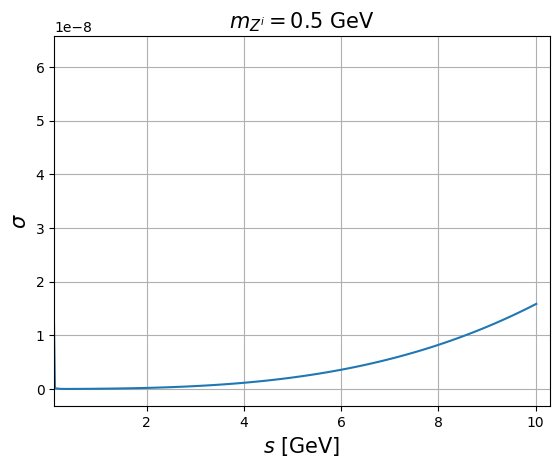

In [90]:
plt.plot(s,sigma(s))
plt.title('$m_{Z^i}=0.5$ GeV', size= 15)
plt.xlabel('$s$ [GeV]',size=15)
plt.ylabel(r'$\sigma$',size=15)
plt.xlim(0.1,10.3)
plt.grid()

$$s-s_0=-2m^2+2E_1E_2-2 \vec{p_1} \cdot \vec{p_2}$$

$$\tilde{s}- 4m^2=2m^2+2E_1E_2-2p_1 \cdot p_2- 4m^2 $$

$$\vec{p_1} \cdot \vec{p_2}=2p_1p_2 \cos \theta_{CM}$$

In [91]:
special.kn(1,np.sqrt(s[0])/T[0])

0.076915344702745

In [92]:
def pfin_pinit(s):
    return np.sqrt(abs(((s-2*m**2)**2)-4*(m**4))/abs(((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))

def p_fin(s):
    return np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s)

def p_init(s):
    return np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s))

def E1(s):
    return np.sqrt(m1**2 + p_init(s)**2)

def E2(s):
    return np.sqrt(m2**2 + p_init(s)**2)

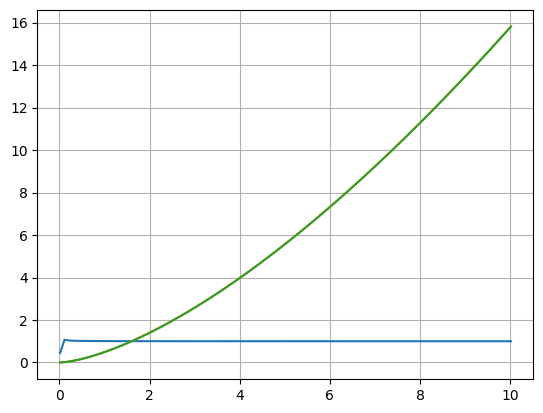

In [93]:
plt.plot(s,pfin_pinit(s-s0))

plt.plot(s,p_fin(s-s0))
plt.plot(s,p_init(s-s0))
#Their value is almost the same

plt.grid()

In [122]:
#def integr(s_tilda):
#    return np.sqrt(s_tilda)* special.kn(1,np.sqrt(s_tilda)/Ttrue)


# container contains the integral value, so it's the numerator of the <sigma*v>

container=[]
for value in range(len(Ttrue)):
    container.append(integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*           np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/T[value]), s0,np.inf)[0])     

    
    #(s_tilda-s0)
    
#NOW IT INTEGRATES THE WHOLE THING, NUT HOW TO INTERPRETATE THE RESULT??
#IT'S TOO LOW??

   
    
    
    
    
    
    
#    ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*(pfin_pinit/s_tilda)*((s_tilda*E1*E2/2)+(2*(p_init**2)*(p_fin**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))     
    
    
    
    
    # pfin_pinit= (np.sqrt(((s-2*m**2)**2)-4*(m**4)/((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))
    #p_fin=  (np.sqrt((((s-2*m**2)**2)-4*(m**4))/4*s))        # p final
    #p_init= (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))
    #E1= (np.sqrt(m1**2 + (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))**2))
    #E2= (np.sqrt(m2**2 + (np.sqrt(abs((((s-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s)))**2))
    #
    
    #((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/((s_tilda-mzprime**2)**2))*((np.sqrt(((s_tilda-2*m**2)**2)-4*(m**4)/((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2)))/s_tilda)*  ((s_tilda*(np.sqrt(m1**2 + (np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2))*(np.sqrt(m2**2 + (np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2))/2)+(2*((np.sqrt(abs((((s_tilda-(m1**2)-(m2**2))**2)-4*(m1**2)*(m2**2))/4*s_tilda)))**2)*((np.sqrt((((s_tilda-2*m**2)**2)-4*(m**4))/4*s_tilda))**2)/3)+((m**2)*(s_tilda-(m1**2)-(m2**2))/2)+((m1*m2)*(s_tilda-2*(m**2))/2)+((m**2)*m1*m2*2))*  
    
    


In [123]:
integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/T[0]), s0,np.inf)[0]



6.9735088539805005e-12

In [124]:
container

[6.9735088539805005e-12,
 6.088007339983869e-12,
 5.294622856394007e-12,
 4.586407638625718e-12,
 3.956650924374125e-12,
 3.3988962559221873e-12,
 2.9069572399889073e-12,
 2.4749315068790467e-12,
 2.0972126392391477e-12,
 1.7684998748477221e-12,
 1.4838054269728705e-12,
 1.2384593091281626e-12,
 1.02811159758e-12,
 8.487321135830712e-13,
 6.966075567955004e-13,
 5.683361703161382e-13,
 4.608200649154742e-13,
 3.712553739303695e-13,
 2.971204496562571e-13,
 2.361623457114104e-13,
 1.8638185675096709e-13,
 1.4601740627777953e-13,
 1.1352808459821138e-13,
 8.757614196017896e-14,
 6.700923665390918e-14,
 5.084272473110498e-14,
 3.824225768336922e-14,
 2.8506927865288016e-14,
 2.105316982908372e-14,
 1.539959040582129e-14,
 1.115286277794261e-14,
 7.994781427623272e-15,
 5.6705371619528786e-15,
 3.9782357433891505e-15,
 2.759651150157361e-15,
 1.8921760861816322e-15,
 1.2819087197087817e-15,
 8.577961377441748e-16,
 5.667417616789038e-16,
 3.6957581657022807e-16,
 8.844846614802924e-17,
 1.

In [125]:
print(len(container))

100


In [126]:
print(len(container))
print(container[0])
print(container[1])
print(container[99])
print(4*m**2)

100
6.9735088539805005e-12
6.088007339983869e-12
6.970219663145276e-46
1.0040040000000002e-06


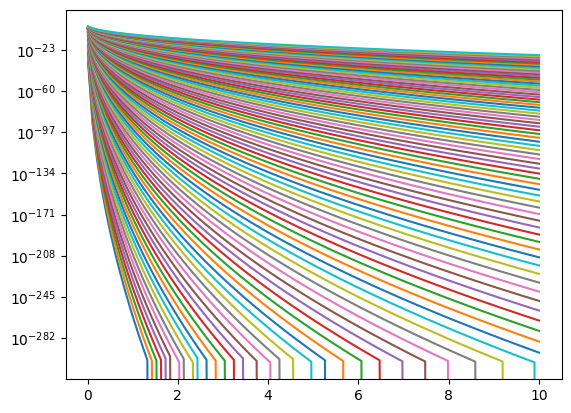

In [127]:
# THOSE AR THE SQRT OF S AND THE BESSEL FUNCTION

linspace=np.linspace(s0,10,100)
for N in range(100):
    plt.plot(linspace, np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))

plt.yscale('log')
#plt.xlim(0, 4*m**2)



# THOSE IN PRINCIPLE SHOULD BE THE PLOT OF THE VARIOUS FUNCTION THAT I HAVE TO INTEGRATE FROM 4*M**2 TO INFINITY

# MAKE SENSE?!?!?!?

# IN MY INTEGRATION s_tilda is a variable in which it integrates into, here is from 0 to 100 GeV, maybe too much?


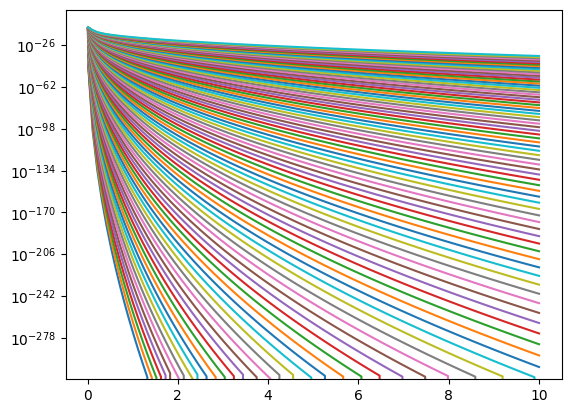

In [128]:
#THOSE ARE THE FUNCTION WE HAVE TO INTEGRATE FROM s0 TO INFINITY

linspace=np.linspace(s0,10,100)
for N in range(100):
    plt.plot(linspace, ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s-s0)-mzprime**2)**2))*(pfin_pinit(s-s0)/(s-s0))*(((s-s0)*E1(s-s0)*E2(s-s0)/2)+(2*(p_init(s-s0)**2)*(p_fin(s-s0)**2)/3)+((m**2)*((s-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*             np.sqrt(s)* special.kn(1,np.sqrt(s)/Ttrue[N]))

plt.yscale('log')

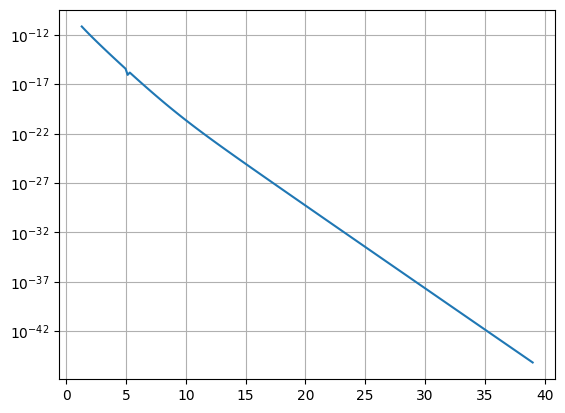

In [129]:

plt.plot(x2,container)
plt.yscale('log')
plt.grid()

# How do I understand which values choose for s_tilda and T??
# They seems not in correlation in each other...
# They are like that just because I chose s_tilda to go from 1 to 100 and T same
# But in principle they can behave differently

# Quello che voglio dire è che s si accoppia con in valori di T a caso
# Il rpimo valore di s è 1, quello di T è 100 e si accoppiano così dando K1(1/100) e così via

# Esiste un legame fra s e la temperatura?!?!?!?!?!?!?!?

In [130]:
def DENOM(x1,x2):
    #T=m/x
    return 1/(8* m1**2 * m2**2  *(m2/x2) *(special.kn(2,x1)*(special.kn(2,x2))))

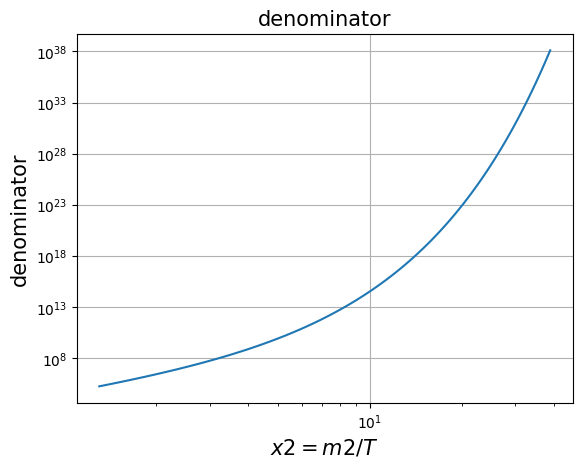

In [131]:
plt.plot(x2,DENOM(x1,x2))
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0.1,100)
plt.xlabel('$x2 = m2/T$', size= 15)
plt.ylabel('denominator', size= 15)
plt.title('denominator', size= 15)
plt.grid()

In [132]:
#HERE IT SHOULD HAVE BEEN IN PRINCIPLE A MULTIPLICATION!!!!!!!!!!!!!!!!!!!!!!

#...... SO BAD...


Total= (container/DENOM(x1,x2))
Total

array([4.07587465e-17, 2.89887723e-17, 2.04998889e-17, 1.44107266e-17,
       1.00676749e-17, 6.98833618e-18, 4.81845782e-18, 3.29925754e-18,
       2.24273620e-18, 1.51310653e-18, 1.01288725e-18, 6.72541723e-19,
       4.42797612e-19, 2.88985188e-19, 1.86887981e-19, 1.19720496e-19,
       7.59411871e-20, 4.76807125e-20, 2.96205770e-20, 1.81992164e-20,
       1.10544494e-20, 6.63525105e-21, 3.93384787e-21, 2.30258288e-21,
       1.32996839e-21, 7.57669289e-22, 4.25507637e-22, 2.35447599e-22,
       1.28293058e-22, 6.88001778e-23, 3.62912344e-23, 1.88183138e-23,
       9.58650405e-24, 4.79476241e-24, 2.35299468e-24, 1.13223052e-24,
       5.33845386e-25, 2.46469723e-25, 1.11345961e-25, 4.91857020e-26,
       7.89678867e-27, 8.94691518e-27, 3.67883668e-27, 1.47481770e-27,
       5.76025618e-28, 2.19033134e-28, 8.10284483e-29, 2.91426202e-29,
       1.01835144e-29, 3.45519544e-30, 1.13761745e-30, 3.63268225e-31,
       1.12445141e-31, 3.37228520e-32, 9.79434750e-33, 2.75355170e-33,
      

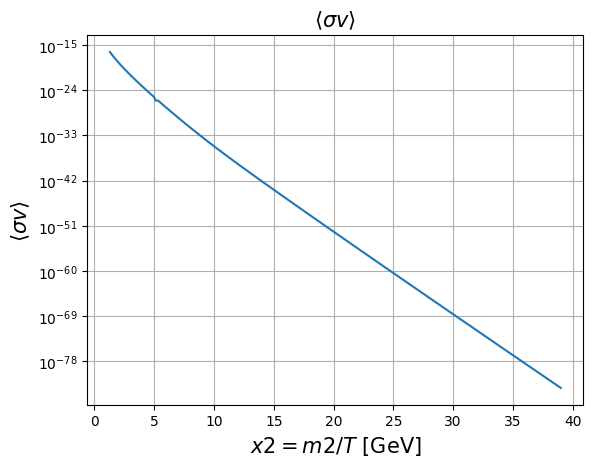

In [133]:
# plot of the total <sigma*v>

plt.plot(x2,Total)


plt.xlabel(r'$x2 = m2/T$ [GeV]', size= 15)
plt.ylabel( r'$\langle \sigma v \rangle$', size= 15)
plt.title( r'$\langle \sigma v \rangle$', size= 15)
plt.yscale('log')
plt.grid() 




$$x_f= \ln [0.038(n+1)(g/g_*^{1/2}) m_{Pl}m \sigma_0]- \Big( n+ \frac{1}{2} \Big) \ln \{\ln[0.038(n+1)(g/g_*^{1/2}) m_{Pl}m \sigma_0] \}$$

### I have shifted the s0 because sigma(s0) is WAY more different (7 order of magnitude) respect to a value nearby and still into the range (s0, Energy max) .
### Energy max is (E1+E2)^2 considering the max velocity for iDM of 0.1c 
### The shift is of 0.00003........ Can we make a better assumption?
### Actually I don't think that consider s0=(m1+m2)^2 is a great assumption. 
### How could be possible that the two iDM candidate find themself at rest?!?!!

In [200]:
sigma0=sigma(s0+0.00003)
sigma0

2.9577798202717134e-07

In [203]:
sigma(s0)

1.5746728851376235

In [135]:
pfin_pinit(s0+0.03)

1.2034695407871374

In [207]:
# It's fine to define the xf just in function of just sigma0 cohannilation

# If you had an other process that involves different diagrams ypu had to insert all the sigma0
# LOOK (3.12) of the Draft shared with Asli. comes from Kolb Turner

def xf1(s0):
    return np.log(0.038*Mp*m1*sigma(s0))- (0.5)*np.log(np.log(0.038*Mp*m1*sigma(s0)))

In [210]:
xf1(s0+0.00003)         # HERE IT'S CRUCIAL

21.088364693510595

In [213]:
def xf2(s0):
    return np.log(0.038*Mp*m2*sigma(s0))- (0.5)*np.log(np.log(0.038*Mp*m2*sigma(s0)))

In [214]:
xf2(s0+0.00003)

21.344970137342603

In [226]:
# So we can now compute what is the T value of freezeout for both the candidates

Tfo1=m1/xf1(s0+0.00003)
Tfo2=m2/xf2(s0+0.00003)

print(Tfo1)
print(Tfo2)

0.002370975688569452
0.003045213911369395


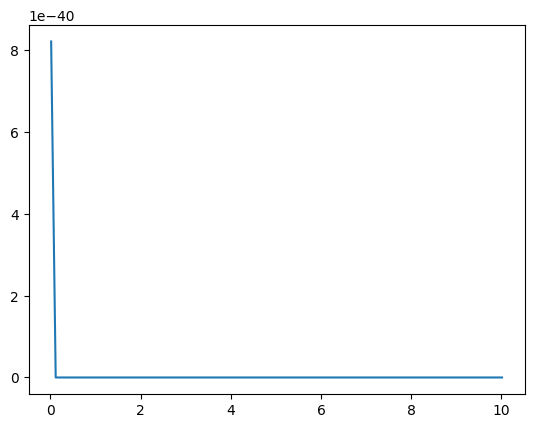

In [169]:

plt.plot(s,  ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s)-mzprime**2)**2))*(pfin_pinit(s)/(s))*(((s)*E1(s)*E2(s)/2)+(2*(p_init(s)**2)*(p_fin(s)**2)/3)+((m**2)*((s)-(m1**2)-(m2**2))/2)+((m1*m2)*((s)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s)* special.kv(1,np.sqrt(s)/Tfo2))




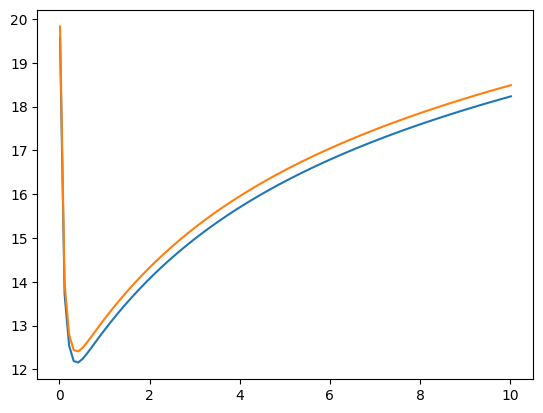

In [216]:
plt.plot(s,xf1(s))
plt.plot(s,xf2(s))



In [217]:
velocity=0.1         # MATHEUS LAST TIME SAID THAT AT MAXIMUM I HAVE TO CONSIDER v=0.1c

Energy1= np.sqrt((m1**2)+ (m1* (1/np.sqrt(1-velocity**2))*velocity)**2)
Energy2= np.sqrt((m2**2)+ (m2* (1/np.sqrt(1-velocity**2))*velocity)**2)

print(Energy1)
print(Energy2)

# BASICALY IS LIKE JUST CONSIDER THE ENERGY AT REST

0.05025189076296061
0.06532745799184879


$$E_2 \approx E_1= \sqrt{m_1^2+ p_1^2}=\sqrt{(0.05)^2+ (0.05 \gamma 0.1c)^2}=\sqrt{(0.05)^2+ (0.05 \frac{1}{\sqrt{1-(0.1)^2}} 0.1c)^2}$$

In [218]:
s0

0.013225

In [219]:
# CONSIDERING THE VELOCITY EQUAL TO 0.1c THE CENTRE OF MASS ENERGY SQUARED (s) BECOMES:

(Energy1+ Energy2)**2

0.013358585858585863

In [220]:
#DIFFERENCE BETWEEN THE MAX ENERGY REACHABLE AND THE ENERGY AT REST

(Energy1+ Energy2)**2-s0

0.00013358585858586243

In [227]:
# NOW I CAN CALCULATE PROPERLY THE INTEGRAL AND THE DENOMINATOR FOR A PRECISE T

# I am using Tfo2 in the numerator

NUMERATOR=integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/Tfo2), s0+0.00003, np.inf )[0]    

NUMERATOR

#  integrate.quad(lambda s_tilda: ((16*np.pi*(epsilon**2)*alpha_dark*alpha_em)/(((s_tilda-s0)-mzprime**2)**2))*(pfin_pinit(s_tilda-s0)/(s_tilda-s0))*(((s_tilda-s0)*E1(s_tilda-s0)*E2(s_tilda-s0)/2)+(2*(p_init(s_tilda-s0)**2)*(p_fin(s_tilda-s0)**2)/3)+((m**2)*((s_tilda-s0)-(m1**2)-(m2**2))/2)+((m1*m2)*((s_tilda-s0)-2*(m**2))/2)+((m**2)*m1*m2*2))*np.sqrt(s_tilda)* special.kv(1,np.sqrt(s_tilda)/Tfo2), s0, np.inf )[0]

3.855646058169781e-31

In [229]:

DENOMINATOR= 1/(8* m1**2 * m2**2  *Tfo1 *(special.kn(2,m1/Tfo1)*(special.kn(2,m2/Tfo2))))

DENOMINATOR

#   1/(8* m1**2 * m2**2  *Tfo1 *(special.kn(2,m1/Tfo1)*(special.kn(2,m2/Tfo2))))

1.5217427234832051e+26

In [230]:
SIGMAVTERMAL=NUMERATOR*DENOMINATOR

SIGMAVTERMAL

5.867301333346567e-05

$$1 \text{cm}= 5.068 \times 10^{13} \hbar c \cdot \text{GeV}^{-1}
    \ \ \ \ \ \ \ \ \ 
    1s= 1.519 \times 10^{24} \hbar \cdot \text{GeV}^{-1}
    \ \ \ \ \ \ \ \ \ 
    0.1 \text{pb} \approx 2.6 \times 10^{-10} \hbar c \cdot \text{GeV}^{-2}$$

$$\frac{cm^3}{s}=\frac{(5.068 \times 10^{13} \hbar c \cdot \text{GeV}^{-1})^3}{1.519 \times 10^{24} \hbar \cdot \text{GeV}^{-1}}= 8.569432 \times 10^{16} \text{GeV}^{-2} $$

$$\text{GeV}^{-2}=0.11669385 \times 10^{-16} \frac{cm^3}{s}= 1.1669385 \times 10^{-17} \frac{cm^3}{s}$$

In [231]:
SIGMAVTERMAL*1.1669385*1E-17

6.846779816983444e-22

$$\langle \sigma v \rangle= 0.0005992953367809461 \ \text{GeV}^{-2}= 6.846779816983444 \times 10^{-22} \frac{cm^3}{s} $$